**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 3 – Classifier

Nok Wongpiromsarn, 10 August 2022

## 1. Get and visualize the data to gain insights

In [1]:
import os
import pandas as pd

data_path = os.path.join("datasets", "german_credit_data.csv")
data = pd.read_csv(data_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Text(0, 0.5, 'Count')

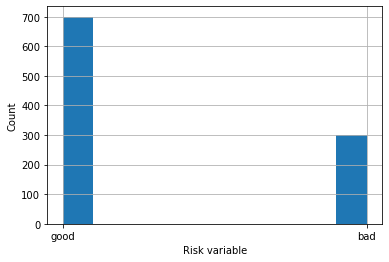

In [2]:
import matplotlib.pyplot as plt

data["Risk"].hist()
plt.xlabel("Risk variable")
plt.ylabel("Count")

<AxesSubplot:xlabel='Job', ylabel='Duration'>

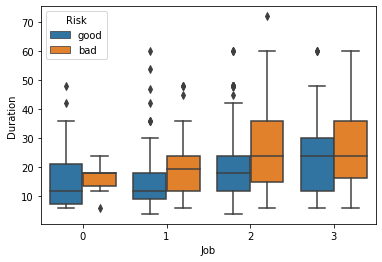

In [3]:
import seaborn as sns

sns.boxplot(x="Job", y="Duration", hue="Risk", data=data)

## 2. Separate the data into features (x) and label (y) such that

- y is a binary target, indicating whether risk is "good"
- x contains the following numerical columns: Age, Job, Credit amount, Duration.


In [4]:
attributes = ["Age",
              "Job",
              "Credit amount",
              "Duration"
             ]

x = data[attributes]
y = (data["Risk"] == "good")

## 3. Pick 2 of the following classifiers and train them, using only numeric features.

- Gaussian Naive Bayes
- Decision Tree
- KNN
- LogisticRegression



In [5]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(x,y)

from sklearn import tree
clf_tree = tree.DecisionTreeClassifier().fit(x,y)

from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier().fit(x,y)

from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression().fit(x,y)

## 4. Report the following performance measures on both classifiers. [2 points]

- training accuracy
- cross-validation accuracy
- confusion matrix
- precision
- recall
- F1
- AUC

In [6]:
# Training accuracy

from sklearn import metrics

y_gnb_pred = clf_gnb.predict(x)
print(metrics.accuracy_score(y, y_gnb_pred))

y_tree_pred = clf_tree.predict(x)
print(metrics.accuracy_score(y, y_tree_pred))

y_knn_pred = clf_knn.predict(x)
print(metrics.accuracy_score(y, y_knn_pred))

y_lg_pred = clf_lg.predict(x)
print(metrics.accuracy_score(y, y_lg_pred))

0.71
1.0
0.745
0.712


In [7]:
# cross-validation accuracy

from sklearn.model_selection import cross_val_score

print(cross_val_score(clf_gnb, x, y, cv=3, scoring="accuracy"))
print(cross_val_score(clf_tree, x, y, cv=3, scoring="accuracy"))
print(cross_val_score(clf_knn, x, y, cv=3, scoring="accuracy"))
print(cross_val_score(clf_lg, x, y, cv=3, scoring="accuracy"))

[0.70958084 0.6996997  0.6996997 ]
[0.60479042 0.60960961 0.63963964]
[0.62874251 0.64864865 0.65465465]
[0.70658683 0.6966967  0.70870871]


In [8]:
from sklearn.model_selection import cross_val_predict

y_gnb_pred = cross_val_predict(clf_gnb, x, y, cv=3)
y_tree_pred = cross_val_predict(clf_tree, x, y, cv=3)
y_knn_pred = cross_val_predict(clf_knn, x, y, cv=3)
y_lg_pred = cross_val_predict(clf_lg, x, y, cv=3)

In [9]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, y_gnb_pred))
print(confusion_matrix(y, y_tree_pred))
print(confusion_matrix(y, y_knn_pred))
print(confusion_matrix(y, y_lg_pred))

[[ 74 226]
 [ 71 629]]
[[119 181]
 [202 498]]
[[ 57 243]
 [113 587]]
[[ 33 267]
 [ 29 671]]


In [10]:
# Precision, recall and F1

from sklearn.metrics import precision_score, recall_score, f1_score

print("Naive Bayes:")
print("  precision: {}".format(precision_score(y, y_gnb_pred)))
print("  recall:    {}".format(recall_score(y, y_gnb_pred)))
print("  f1 score:  {}".format(f1_score(y, y_gnb_pred)))


print("Decision Tree:")
print("  precision: {}".format(precision_score(y, y_tree_pred)))
print("  recall:    {}".format(recall_score(y, y_tree_pred)))
print("  f1 score:  {}".format(f1_score(y, y_tree_pred)))

print("KNN:")
print("  precision: ", precision_score(y, y_knn_pred))
print("  recall:    ", recall_score(y, y_knn_pred))
print("  f1 score:  {}".format(f1_score(y, y_knn_pred)))

print("Logistic Regression:")
print("  precision: ", precision_score(y, y_lg_pred))
print("  recall:    ", recall_score(y, y_lg_pred))
print("  f1 score:  {}".format(f1_score(y, y_lg_pred)))

Naive Bayes:
  precision: 0.735672514619883
  recall:    0.8985714285714286
  f1 score:  0.8090032154340836
Decision Tree:
  precision: 0.7334315169366715
  recall:    0.7114285714285714
  f1 score:  0.7222625090645394
KNN:
  precision:  0.7072289156626506
  recall:     0.8385714285714285
  f1 score:  0.7673202614379084
Logistic Regression:
  precision:  0.7153518123667377
  recall:     0.9585714285714285
  f1 score:  0.8192918192918193


In [11]:
# AUC
from sklearn.metrics import precision_recall_curve
y_gnb_scores = cross_val_predict(clf_gnb, x, y, cv=3, 
                                 method="predict_proba")
y_tree_scores = cross_val_predict(clf_tree, x, y, cv=3, 
                                 method="predict_proba")
y_knn_scores = cross_val_predict(clf_knn, x, y, cv=3, 
                                 method="predict_proba")
y_lg_scores = cross_val_predict(clf_lg, x, y, cv=3, 
                                 method="predict_proba")

#from sklearn.metrics import roc_auc_score
#roc_auc_score(y, y_gnb_scores)

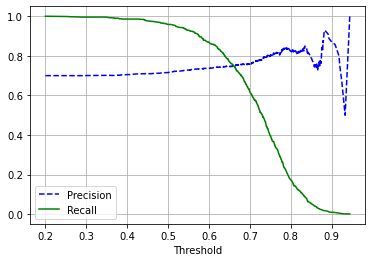

In [12]:
import matplotlib.pyplot as plt

# keep probabilities for the positive outcome only
precisions, recalls, thresholds = precision_recall_curve(y, y_lg_scores[:,1])
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.grid()
plt.legend()
plt.xlabel("Threshold")
plt.show()

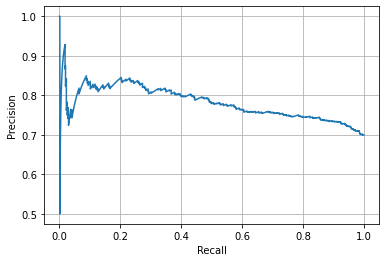

In [13]:
# Plot precision versus recall
plt.plot(recalls, precisions)
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y, y_gnb_scores[:,1]))
print(roc_auc_score(y, y_tree_scores[:,1]))
print(roc_auc_score(y, y_knn_scores[:,1]))
print(roc_auc_score(y, y_lg_scores[:,1]))

0.6200809523809524
0.5580952380952381
0.5495428571428571
0.6310904761904762
